In [160]:
import numpy as np, matplotlib.pyplot as plt, scipy, scienceplots, math
from random import randint
plt.style.use('science') #science plots isn't working on laptop for some reason

# Assignment 4
### Section 7.1
Page 199

#### (a)

First we make a functiion wich generates a list of positions for a random walk.

In [118]:
def rand_walk(start=(0,0), steps=1000):
    data = []
    x, y = start[0],start[1]
    dx, dy = 1, 1
    for setp in range(steps):
        data.append([x,y])
        rand = randint(0,7) # generate 8 possible random numbers for 8 possible random steps 
        if rand == 0: # bassed on the output of the randint function, take a one step in one of the eight possible directions
            x += dx 
            y += dy
        elif rand == 1: 
            x -= dx 
            y += dy
        elif rand == 2: 
            x += dx 
            y -= dy
        elif rand == 3: 
            x -= dx 
            y -= dy        
        elif rand == 4: x += dy
        elif rand == 5: x -= dy
        elif rand == 6: y += dy
        elif rand == 7: y -= dy
    return np.array(data).T # return the transpose of the array so it's easier to plot

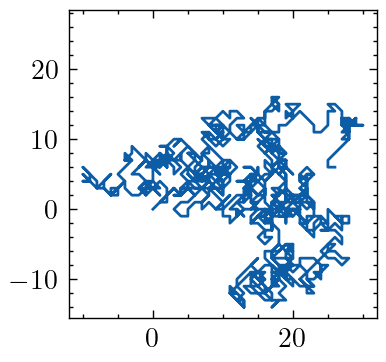

In [119]:
x, y = rand_walk() # call the function to create the x and y values for the plot
fig, ax = plt.subplots(1,1,figsize=(2,2),dpi=200)
ax.plot(x,y)
ax.axis('square')
plt.show()

#### (b)

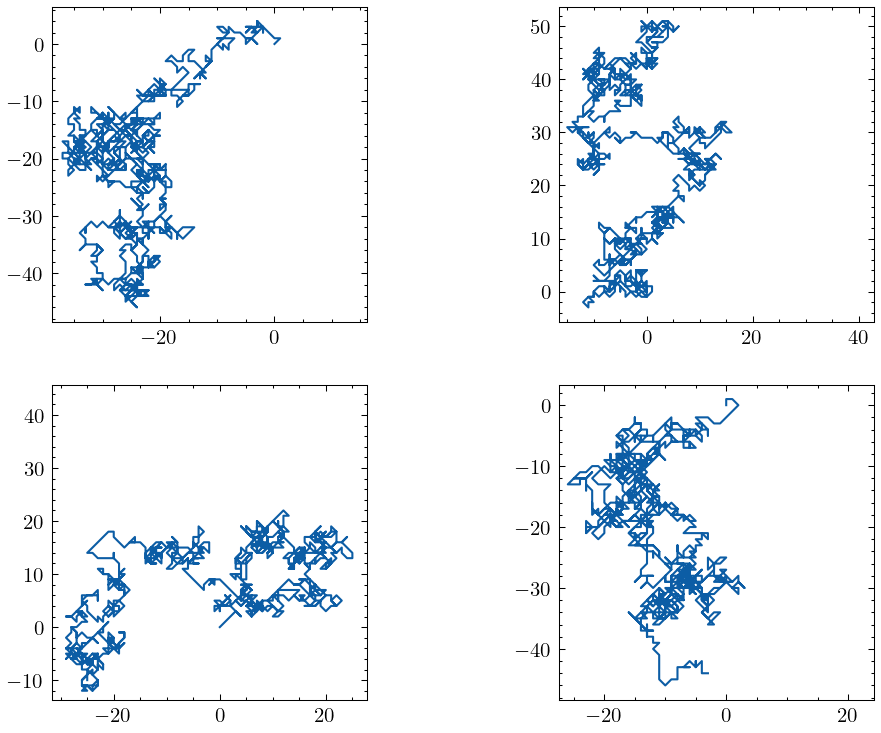

In [120]:
fig, ax = plt.subplots(2,2,figsize=(8,6),dpi=150)
axes_x, axes_y = [0,0,1,1,], [0,1,0,1] # setting up the indices for the axes
for i0, (i1, i2) in enumerate(zip(axes_x,axes_y)): # loop through the indices of the axes plot a seperate random walk for each set of indices
    x,y = rand_walk()
    ax[i1,i2].plot(x,y,label="plot{i0}")
    ax[i1,i2].axis('square')
plt.show()

### 7.2
####  (a)

The question asks us to make one plot then also asks to plot the end points. With one plot there should be only one end point. This does not make any sense. 

In [121]:
def displacement(x,y): # making a function that returns the displacement of a 2D point from the origion 
    return np.sqrt(x**2+y**2)

Next, we create a function which preforms N random walks with a given number of steps and returns the endpoints for these walks as well as the displacement form these endpoints.

In [122]:
def endpoint_distribution(N=1000, steps=1000):
    endpoints, endpoint_distances = [], []
    for i in range(N):
        x, y = rand_walk(steps=steps)
        dif = displacement(x[-1], y[-1])
        endpoints.append([x[-1], y[-1]])
        endpoint_distances.append(dif)
    endpoints = np.array(endpoints).T
    return endpoints, endpoint_distances

In [123]:
endpoints, endpoint_distances = endpoint_distribution(N=1000, steps=1000) # call the endpoint_distribution function to generate data

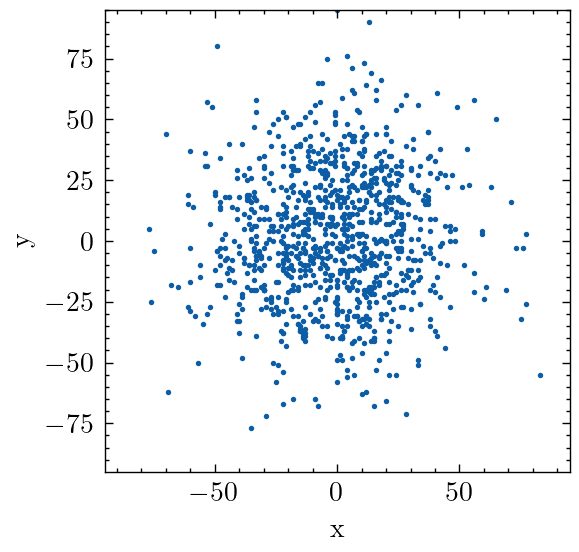

In [124]:
fig, ax = plt.subplots(1,1,figsize=(3,3),dpi=200)
ax.scatter(endpoints[0], endpoints[1], s=0.9) # making a scatter plot with the endpoints data
ax.set_xlabel("x")
ax.set_ylabel("y")
max_endpoint = max(endpoints.flatten()) # get the max value form the flattened list of endpoints
ax.set_xlim(-max_endpoint,max_endpoint) # use the max value to set the limits of the x and y axis
ax.set_ylim(-max_endpoint,max_endpoint)
_=plt.plot()

#### (b)

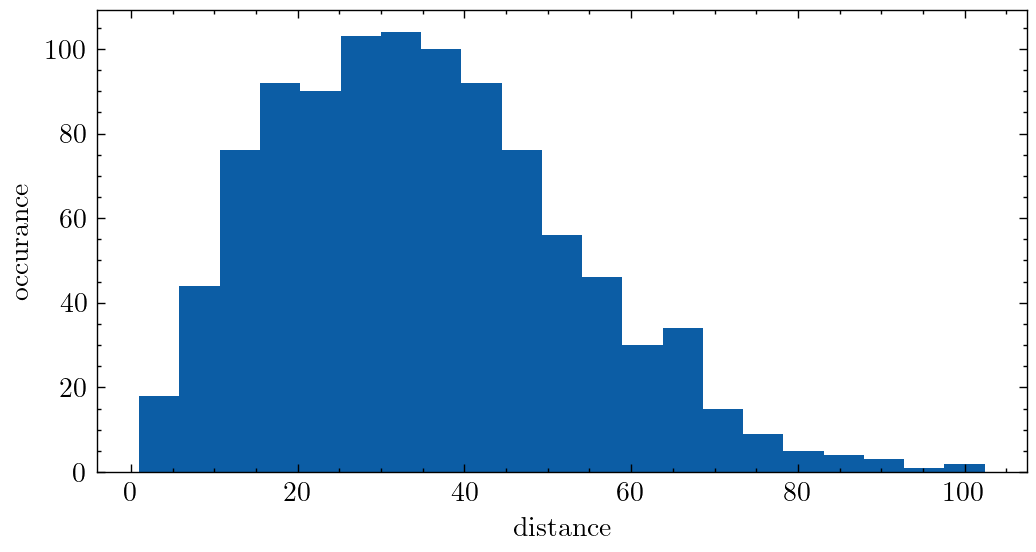

In [187]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(endpoint_distances, bins='auto')
x = np.linspace(0,100,20)
ax.set_xlabel("distance")
ax.set_ylabel("occurance")
_=plt.plot()

#### (c)

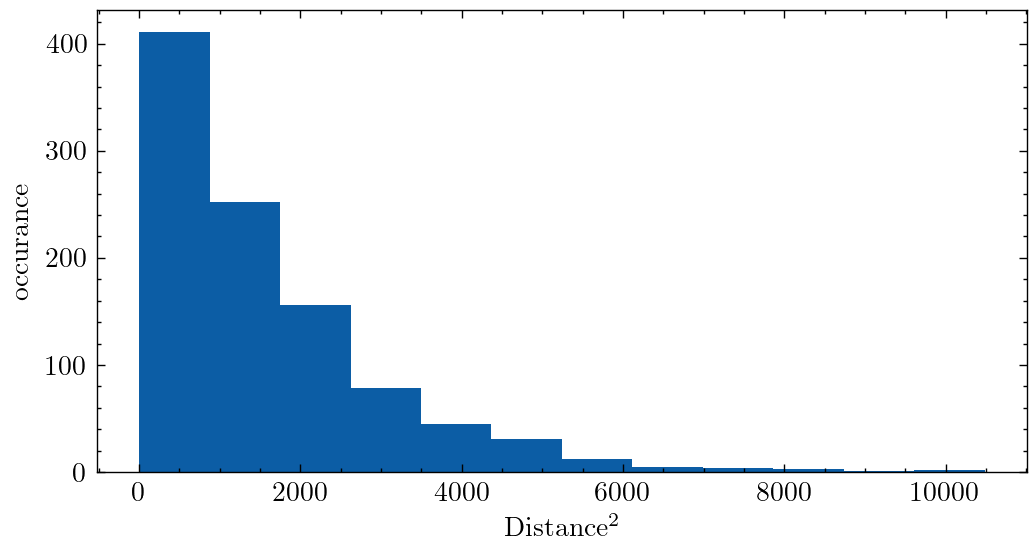

In [188]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(np.array(endpoint_distances)**2, bins=12)
ax.set_xlabel("Distance$^2$")
ax.set_ylabel("occurance")
_=plt.plot()

C:\Users\gkerr\AppData\Local\Temp\ipykernel_21664\1151582330.py:14: RuntimeWarning: divide by zero encountered in log
  ax.bar(x_bins+maxVal/(2*num_bars),np.log(frequencies),width=maxVal/num_bars,label="ln(Frequencies)")


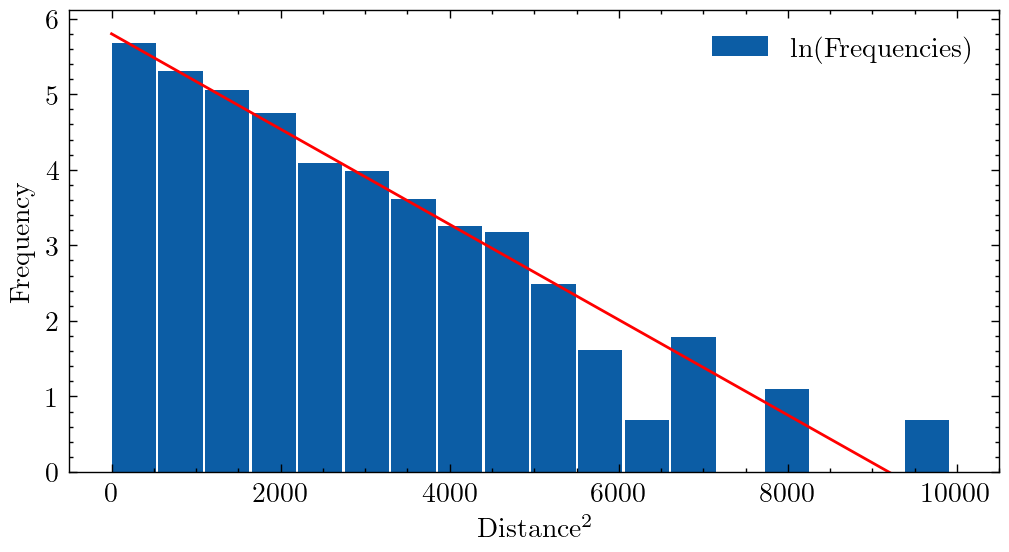

In [296]:
num_bars = 20
max_endpoints_squared = np.array(endpoint_distances)**2
maxVal = max(max_endpoints_squared)
x_bins = np.linspace(0,maxVal,num_bars)
frequencies = np.zeros(num_bars)
for ii, ee in enumerate(x_bins):
    for i, e in enumerate(max_endpoints_squared):
        try:
            if e >= x_bins[ii] and e < x_bins[ii+1]:
                frequencies[ii] += 1
        except: 
            pass
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.bar(x_bins+maxVal/(2*num_bars),np.log(frequencies),width=maxVal/num_bars,label="ln(Frequencies)")
x = np.linspace(0,10_000,20)
m, b = -10**-3.2, 5.8
y = m*(x)+b
ax.plot(x,y,color="red")
ax.set_xlabel("Distance$^2$")
ax.set_ylabel("Frequency")
ax.set_ylim(0)
ax.legend()
_=plt.plot()

#### (d)

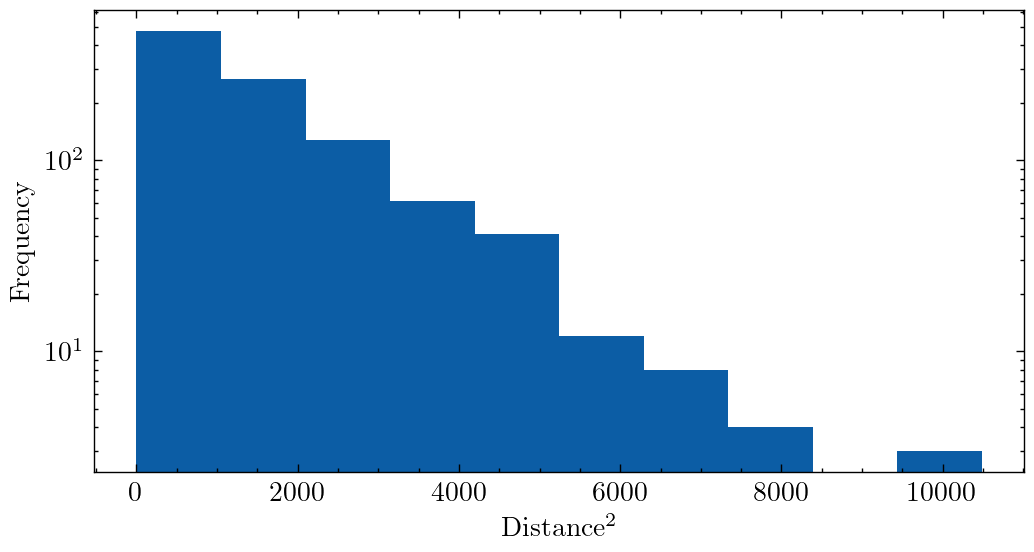

In [216]:
fig, ax = plt.subplots(1,1,figsize=(6,3),dpi=200)
ax.hist(np.array(endpoint_distances)**2, bins=10)
#x = np.linspace(0,1000,20)
#m, b = -10**-2, 40
#y = np.exp(m*(x**2)+b)
#ax.plot(x,y)
ax.set_xlabel("Distance$^2$")
ax.set_ylabel("Frequency")
ax.set_yscale('log')
_=plt.plot()

There seems to be a linear relationship between $\text{Distance}^2$ and $\ln(\text{occurence})$.

#### (e)

In [128]:
np.mean(np.array(endpoint_distances)**2)

1402.272

#### (f)

In [129]:
endpoints, endpoint_distances = endpoint_distribution(N=1000, steps=1000)

In [130]:
np.mean(np.array(endpoint_distances)**2)

1552.406

### 7.3.1

#### (a)

$$
P(l) = \frac{e^{-\lambda}\cdot\lambda^l}{l!}
$$
$l$ is the number of occurrences
$\lambda$ is the expected value and also it's variance 

In [131]:
poisson = lambda l, lamb: np.exp(-lamb)*(lamb**l)/scipy.special.factorial(l)

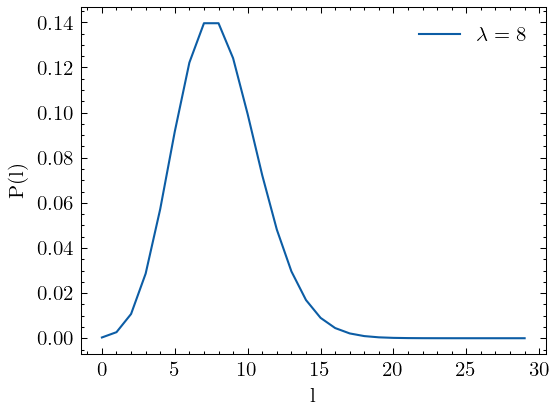

In [132]:
x = np.arange(30,dtype=float)
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.plot(x, poisson(l=x,lamb=8),label="$\lambda = 8$")
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

#### (b)

In [133]:
def flip(chance_of_heads=8): # 1 represents heads and 0 represents tails 
    if randint(1,100) <= chance_of_heads: return 1
    else: return 0

In [134]:
def flip_trial(num_flips=100):  
    return [flip() for i in range(num_flips)] # returns of list of heads and tails 

In [135]:
def master_flip_trial(N=1000):
    return [sum(flip_trial()) for i in range(N)]

#### (c)

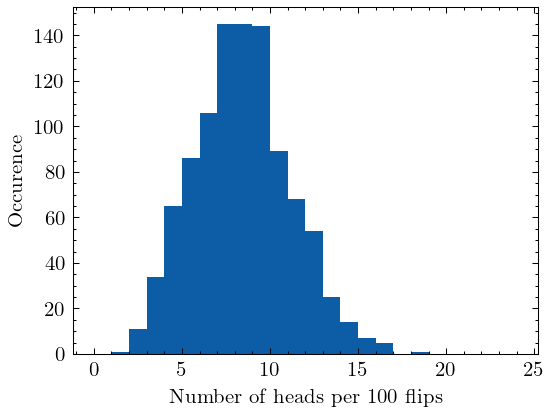

In [136]:
N = 1000
bins = np.arange(25,dtype=int)
fig,ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=bins)
ax.set_xlabel("Number of heads per 100 flips")
ax.set_ylabel("Frequency")
_ = plt.show()

#### (d)

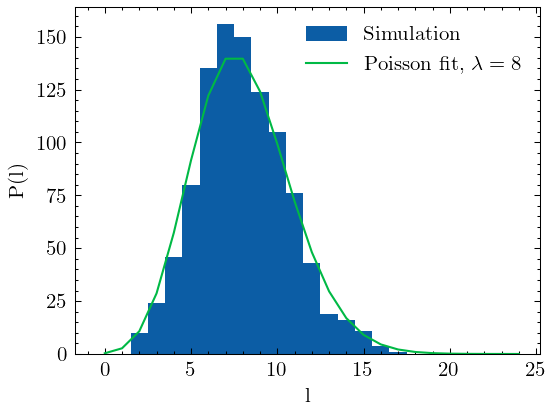

In [137]:
N=1000
x = np.arange(25,dtype=float)
bins = np.arange(25,dtype=float)-0.5
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=bins,label="Simulation")
ax.plot(x, poisson(l=x,lamb=8)*N,label=f"Poisson fit, $\lambda = 8$")
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

#### (e)

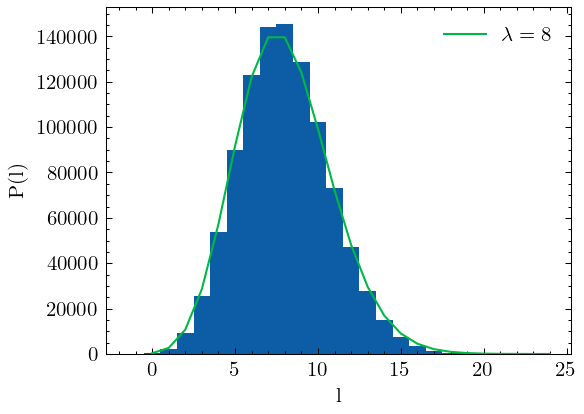

In [138]:
N = 1_000_000
x = np.arange(25,dtype=float)
bins = np.arange(25,dtype=float)-1.5
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(master_flip_trial(N=N),bins=bins)
ax.plot(x, poisson(l=x,lamb=8)*N,label=f"$\lambda = 8$")
ax.set_xlabel("l")
ax.set_ylabel("P(l)")
ax.legend()
_=plt.show()

### 7.3.2

#### (a)

In [139]:
def freq(arr):
    ones = np.nonzero(arr)
    return np.diff(ones[0])

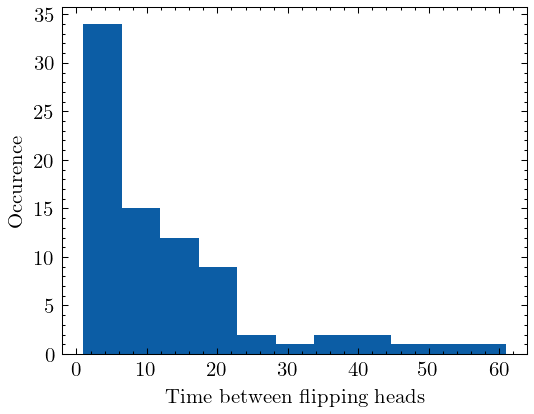

In [140]:
N = 1000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins='auto')
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
_=plt.show()

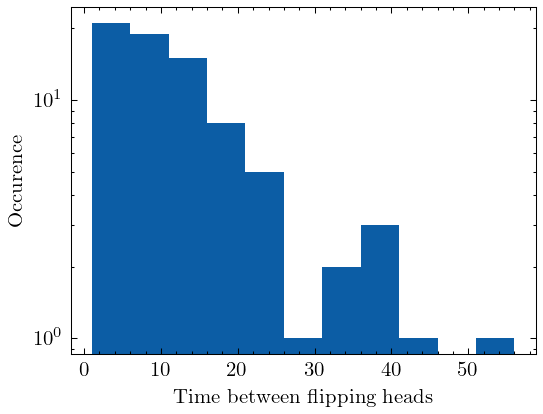

In [143]:
N = 1000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins='auto')
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
ax.set_yscale('log')
_=plt.show()

There seemss to be a linear relationship between the instances where heads is flipped and the log of the frequency.

#### (b)

In [141]:
print(f"The average waiting time is {round(np.mean(freq(flip_trial(num_flips=10_000))),2)} flips.")

The average waiting time is 11.94 flips.


#### (c)

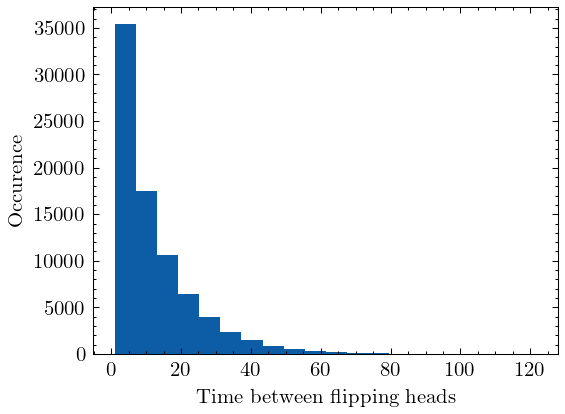

In [142]:
N = 1_000_000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins=20)
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
_=plt.show()

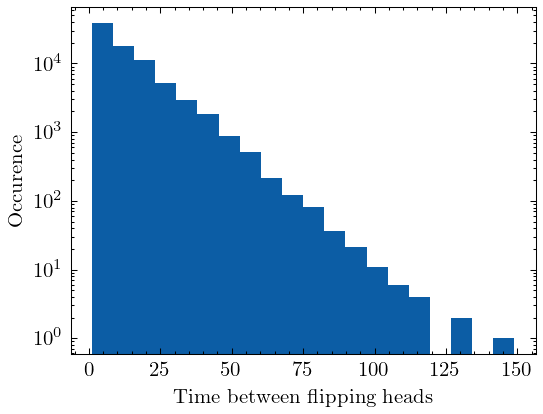

In [144]:
N = 1_000_000
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)
ax.hist(freq(flip_trial(num_flips=N)),bins=20)
ax.set_xlabel("Time between flipping heads")
ax.set_ylabel("Frequency")
ax.set_yscale("log")
_=plt.show()

With more data, we can comfirm that the realtiionship is indeed linear. 

### Bonus Question